<font color="#CA3532"><h1 align="left">Máster en Big Data y Data Science - Fundamentos de Análisis de Datos</h1></font>
<font color="#6E6E6E"><h2 align="left">Correlación e Información Mutua entre variables continuas</h2></font>

Primero importaremos las librerías que necesitaremos, además de activar el modelo inline para las gráficas generadas por matplotlib. También inicializaremos la semilla del generador de números aleatorios.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression

In [2]:
def create1D_problem(problema, N, slope, noise_level):

    np.random.seed(1)
    if problema == 'linear':
        x1 = np.random.rand(N,1)*10
        y = slope*x1.flatten()
    elif problema == 'sin':
        x1 = np.random.rand(N,1)*2*np.pi
        y = np.sin(x1.flatten())
    elif problema == '-cos':
        x1 = np.random.rand(N,1)*2*np.pi
        y = -np.cos(x1.flatten())
    else:
        x1 = np.random.rand(N,1)*np.pi
        y = np.cos(x1.flatten())
        
    noise = noise_level*np.random.randn(N)
    y = y + noise
    x2 = np.random.rand(N,1)
    x = np.concatenate((x1,x2),axis=1)
    return x, y

In [3]:
def plotData(x,y,style,title):
    plt.plot(x,y,style)
    plt.grid(True)
    plt.axis([x.min()-0.2, x.max()+0.2, y.min()-0.2, y.max()+0.2])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)

In [4]:
def mutual_information(x, y, bins):
    return mutual_info_score(None, None, contingency=np.histogram2d(x, y, bins)[0])

def normalized_mutual_information(x, y, bins):
    mutual_info = mutual_information(x, y, bins)
    h1 = mutual_information(x,x, (bins[0], bins[0]))
    h2 = mutual_information(y,y, (bins[1], bins[1]))
    return mutual_info / np.max((h1,h2))

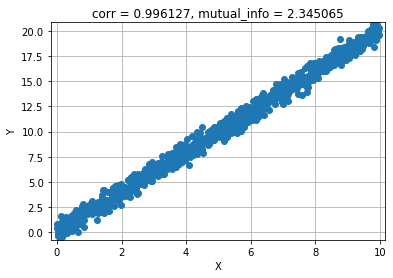

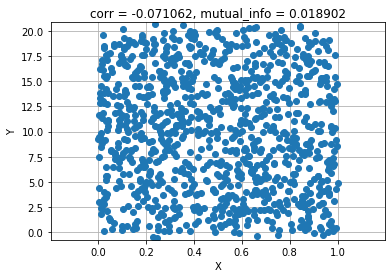

In [5]:
N = 1000
slope = 2
noise_level = .5
#bins = (50,50)

problema = 'linear'
#problema = '-cos'
#problema = 'sin'
#problema = 'pol'

x, y = create1D_problem(problema, N, slope, noise_level)

var = 0
mutual_infos = mutual_info_regression(x, y)
#mutual_info = mutual_information(x[:,var],y[:,0],bins)
mutual_info = mutual_infos[var]
plotData(x[:,var],y,'o', ("corr = %f, mutual_info = %f" % (np.corrcoef(x[:,var],y,rowvar=0)[0,1], mutual_info)))
plt.show()

var = 1
#mutual_info = mutual_information(x[:,var],y[:,0],bins)
mutual_info = mutual_infos[var]
plotData(x[:,var],y,'o', ("corr = %f, mutual_info = %f" % (np.corrcoef(x[:,var],y,rowvar=0)[0,1], mutual_info)));

In [6]:
def my_func(problema='linear', N=1000, slope=2, noise_level=0.5, var=0):

    x, y = create1D_problem(problema, N, slope, noise_level)
    mutual_info = mutual_info_regression(x, y)[0]
    plotData(x[:,var], y, 'o', ("corr = {}, mutual_info = {}".format(np.corrcoef(x[:,var],y,rowvar=0)[0,1],
                                                                     mutual_info)));

In [7]:
from ipywidgets import interactive, IntSlider, FloatSlider
from IPython.display import display

a = interactive(my_func,
                problema=['linear', 'sin', '-cos', 'pol'],
                N=IntSlider(min=10, max=10000, value=1000),
                slope=FloatSlider(min=-5., max=5., value=2.),
                noise_level=FloatSlider(min=1e-5, max=5., value=0.5),
                var=list(range(x.shape[1]))
               )
display(a)

interactive(children=(Dropdown(description='problema', options=('linear', 'sin', '-cos', 'pol'), value='linear…